 Etiket Uyumu Kontrolü:
Savasy labels: [0 1]
Custom model labels: [0. 1.]
My_trained_model distribution:
Negative: 18.73%
Positive: 81.27%

 Pre-trained_model (Savasy) distribution:
Negative: 44.19%
Positive: 55.81%
 Savasy accuracy (Savasy = Ground Truth, Only 0 & 1): 62.66%

Detailed metrics (Savasy = Ground Truth):
Precision: 61.36%
Recall: 89.35%
F1-score: 72.76%
My model accuracy (Custom = Ground Truth, Only 0 & 1): 62.66%

Detailed metrics (Custom = Ground Truth):
Precision: 89.35%
Recall: 61.36%
F1-score: 72.76%


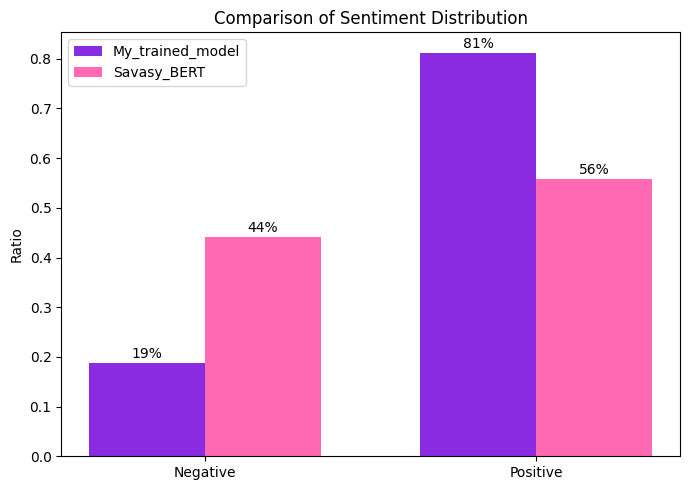


 Confusion Matrix (Savasy = Ground Truth):
[[2275 5584]
 [1057 8869]]

             Predicted
           | Neg | Pos
    -------+-----------
True Neg | 2275 | 5584
True Pos | 1057 | 8869



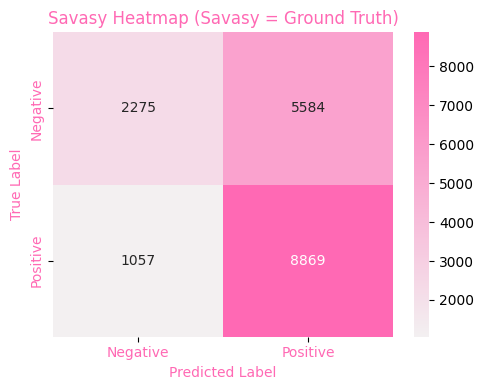

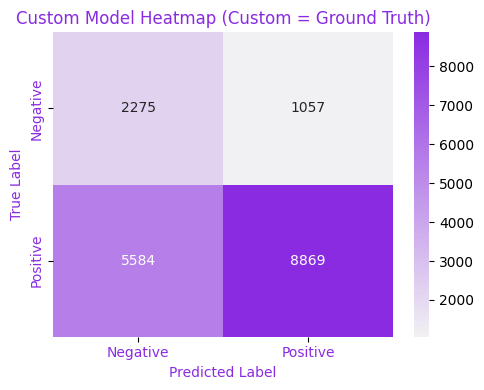


 Sample mismatched predictions:
                                           comment_clean  label_custom_model  \
4663   sevdiğim bir marka fiyat gayet iyiydi kampanya...                 1.0   
14001                                    güzel yumuşacık                 1.0   
8570   şekilde gönderildi ama kasım indiriminde şuank...                 1.0   
4337                                            memnunum                 1.0   
10161  yağlı saçlar gayet güzel gerçekten ne kepek ya...                 1.0   
8179                                           ürünü iyi                 1.0   
9127                                       memnun kaldım                 1.0   
3416                                          idare eder                 0.0   
683    erkek kokusu ama ben kendim kullanıyorum ter k...                 1.0   
16123  sürekli kullandığım ürün indirimden aldım iyi ...                 1.0   

       label_savasy  
4663              0  
14001             0  
8570              0 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "birlesik_tahmin.csv")

etiketler = [0, 1]

##etiket uyumu var mı kontrol edelim
print(" Etiket Uyumu Kontrolü:")
print("Savasy labels:", df["label_savasy"].unique())
print("Custom model labels:", df["label_custom_model"].unique())

# Distrubitonlar
my_model_distribution = df["label_custom_model"].value_counts(normalize=True).reindex(etiketler, fill_value=0).sort_index()
savas_distribution = df["label_savasy"].value_counts(normalize=True).reindex(etiketler, fill_value=0).sort_index()

print("My_trained_model distribution:")
for i, oran in my_model_distribution.items():
    etiket = ["Negative", "Positive"][i]
    print(f"{etiket}: {oran:.2%}")

print("\n Pre-trained_model (Savasy) distribution:")
for i, oran in savas_distribution.items():
    etiket = ["Negative", "Positive"][i]
    print(f"{etiket}: {oran:.2%}")

# Accuracy hesaplama: Burada sadece negatif ve pozitif alıyorum.
# İlk accuracy eğer savasy doğru kabul edilirse ikincisi de benim model doğru kabul edilirse
filtered_df = df[df["label_custom_model"].isin([0, 1])]

savasy_accuracy = accuracy_score(filtered_df["label_savasy"], filtered_df["label_custom_model"])
print(f" Savasy accuracy (Savasy = Ground Truth, Only 0 & 1): {savasy_accuracy:.2%}")

print("\nDetailed metrics (Savasy = Ground Truth):")
precision = precision_score(filtered_df["label_savasy"], filtered_df["label_custom_model"], average='binary')
recall = recall_score(filtered_df["label_savasy"], filtered_df["label_custom_model"], average='binary')
f1 = f1_score(filtered_df["label_savasy"], filtered_df["label_custom_model"], average='binary')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

custom_accuracy = accuracy_score(filtered_df["label_custom_model"], filtered_df["label_savasy"])
print(f"My model accuracy (Custom = Ground Truth, Only 0 & 1): {custom_accuracy:.2%}")

print("\nDetailed metrics (Custom = Ground Truth):")
precision = precision_score(filtered_df["label_custom_model"], filtered_df["label_savasy"], average='binary')
recall = recall_score(filtered_df["label_custom_model"], filtered_df["label_savasy"], average='binary')
f1 = f1_score(filtered_df["label_custom_model"], filtered_df["label_savasy"], average='binary')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

# Bar Chart
labels = ["Negative", "Positive"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, my_model_distribution.values, width, label='My_trained_model', color='#8A2BE2')
plt.bar(x + width/2, savas_distribution.values, width, label='Savasy_BERT', color='#FF69B4')

for i, v in enumerate(my_model_distribution.values):
    plt.text(x[i] - width/2, v + 0.01, f"{v:.0%}", ha='center', color='black')

for i, v in enumerate(savas_distribution.values):
    plt.text(x[i] + width/2, v + 0.01, f"{v:.0%}", ha='center', color='black')

plt.ylabel("Ratio")
plt.title("Comparison of Sentiment Distribution")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix (Savasy = ground truth)
cm = confusion_matrix(
    filtered_df["label_savasy"],
    filtered_df["label_custom_model"],
    labels=[0, 1]
)

print("\n Confusion Matrix (Savasy = Ground Truth):")
print(cm)

print(f"""
             Predicted
           | Neg | Pos
    -------+-----------
True Neg | {cm[0][0]:^4} | {cm[0][1]:^4}
True Pos | {cm[1][0]:^4} | {cm[1][1]:^4}
""")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#FF69B4", as_cmap=True),
    yticklabels=["Negative", "Positive"],
    xticklabels=["Negative", "Positive"]
)

plt.title("Savasy Heatmap (Savasy = Ground Truth)", color="#FF69B4")
plt.xlabel("Predicted Label", color="#FF69B4")
plt.ylabel("True Label", color="#FF69B4")
plt.xticks(color="#FF69B4")
plt.yticks(color="#FF69B4")
plt.tight_layout()
plt.show()

# Confusion matrix (Custom = ground truth)
cm_custom = confusion_matrix(
    filtered_df["label_custom_model"],
    filtered_df["label_savasy"],
    labels=[0, 1]
)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_custom,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#8A2BE2", as_cmap=True),
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)

plt.title("Custom Model Heatmap (Custom = Ground Truth)", color="#8A2BE2")
plt.xlabel("Predicted Label", color="#8A2BE2")
plt.ylabel("True Label", color="#8A2BE2")
plt.xticks(color="#8A2BE2")
plt.yticks(color="#8A2BE2")
plt.tight_layout()
plt.show()

# Uyuşmayanları kaydet
mismatched = df[df["label_custom_model"] != df["label_savasy"]]
mismatched.to_csv("uyusmayan_tahminler.csv", index=False)

# Örnek uyuşmazlıklar
print("\n Sample mismatched predictions:")
if len(mismatched) >= 10:
    print(mismatched[["comment_clean", "label_custom_model", "label_savasy"]].sample(10, random_state=42))
else:
    print(mismatched[["comment_clean", "label_custom_model", "label_savasy"]])


In [ ]:
import pandas as pd

base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"
df = pd.read_csv(base_drive_path + "uyusmayan_tahminler.csv")

# Sütun adlarını kontrol edin
print(df.columns)

# Uyumsuz tahminleri göster (Savasy vs Özgün Model)
# Örn: label_savasy = 0 ve label_custom = 1
df_conflict = df[(df['label_savasy'] == 0) & (df['label_custom_model'] == 1)]

# Örnek sayısı
print(f"Pozitif yorumu yanlış negatif olarak sınıflayan Savasy örnek sayısı: {len(df_conflict)}")

# Örnek yorumları göster (başlıca hata kalıpları için)
print("\n--- Hatalı Sınıflandırma Örnekleri ---\n")
for i, row in df_conflict.head(10).iterrows():
    print(f"ID: {row['id']}\nYorum: {row['comment_clean']}\nSavasy Tahmini: {row['label_savasy']} | Özgün Model: {row['label_custom_model']}\n")

# İsteğe bağlı: sonuçları CSV olarak kaydet
df_conflict.to_csv("savasy_false_negatives.csv", index=False)












Index(['id', 'comment_clean', 'label_savasy', 'label_custom_model',
       'label_source'],
      dtype='object')
Pozitif yorumu yanlış negatif olarak sınıflayan Savasy örnek sayısı: 5584

--- Hatalı Sınıflandırma Örnekleri ---

ID: 4
Yorum: ürün iyi bir marka orijinal duruyor
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 14
Yorum: daha ama baya övülen bir ürün
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 19
Yorum: eşime aldım beğendi tavsiye ederim
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 20
Yorum: kendim aldım kokusu koruyuculuğu güzel
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 23
Yorum: ürün kokusu güzel oğlum aldım severek kullanıyor
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 29
Yorum: kokusunu beğendiğim eşime alıyorum severek kullanıyor
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 30
Yorum: gerçekten erkeksi bir koku kokularına oranla yurtdışında en beğenileni kalıcılığı süper babama almıştım ama kendime ayrıca satın aldım
Savasy Tahmini: 0 | Özgün Model: 1.0

ID: 32
Yorum: jahrein önerdi a